**<center><font size = 7> DenseNet121 ile Beyinde İnme Tespiti</font></center>**
***
**yazar** : Yusuf Oğuzay Bilir

**tarih** : 27/06/2022

**İçindekiler**
- <a href='#baslangic'>1. Çalışmanın Önizlemesi</a>
    - <a href='#veriseti'>1.1 Veri Setinin Açıklanması</a>
    - <a href='#inme'>1.2. İnme Nedir ?</a>
- <a href='#ortam'>2. Çalışma Zamanımızı Hazırlıyoruz</a>
- <a href='#import'>3. Data Import and Preprocessing</a>
    - <a href='#verileri_ekleme'>3.1 Verilerin Manuel Olarak Eklenmesi</a>
    - <a href='#onhazirlik'>3.2 Gerekli Kütüphanelerin ve Fonksiyonların Çağırılması</a>
    - <a href='#isleme'>3.3 Verileri İşleme</a>
- <a href='#eda'>4. Veri Setinin Dağılımı</a>
    - <a href='#aug'>4.1. Data Augmentation</a>
        - <a href='#demo'>4.1.1. Demo</a>
        - <a href='#apply'>4.1.2. Apply</a>
    - <a href='#build'>4.2. Model Building</a>
    - <a href='#perf'>4.3. Model Performance</a>
- <a href='#concl'>5. Conclusions</a>

# <a id='baslangic'>1. Çalışmanın Önizlemesi</a>
Bu çalışma Teknofest tarafından 2021 yılında Sağlıkta Yapay Zeka yarışması kapsamında yarışmacılara verilen veri seti üzerinde sınıflandırma yapılarak beyinde inme olup olmadığı tespit edilmesi amacı ile yapılmıştır.

Çalışma, bir CNN modeli kullanılarak yapılmıştır. Çalışmada kullanılacak olan doğruluk metriği `accuracy` olarak seçilmiştir.

$\textrm{Accuracy} = \frac{\textrm{Number of correclty predicted images}}{\textrm{Total number of tested images}} \times 100\%$

| Set | Accuracy |
|:-:|:-:|
| Validation Set* | ~88% |
| Test Set* | ~80% |
<br>

## <a id='veriseti'>1.1 Veri Setinin Açıklanması</a>
* `YES` - İnme var, '1' olarak kodlanmıştır
* `NO` - İnme yok, '0' olarak kodlanmıştır

## <a id='inme'>1.2 İnme Nedir ? </a>
> İnme, beyindeki zayıf kan akışının hücre ölümüne neden olduğur tıbbi durumdur. Başlıca iki türü vardır: kan akışının olmaması nedeniyle iskemik ve kanama nedeniyle hemorajik. Her ikisi de beynin bölümlerinin düzgün çalışmayı durdurmasına neden olur.
>
> ![](https://upload.wikimedia.org/wikipedia/commons/4/49/MCA_Territory_Infarct.svg)
>
Kaynak : [Vikipedi](https://tr.wikipedia.org/wiki/%C4%B0nme#:~:text=%C4%B0nme%2C%20beyindeki%20zay%C4%B1f%20kan%20ak%C4%B1%C5%9F%C4%B1n%C4%B1n,d%C3%BCzg%C3%BCn%20%C3%A7al%C4%B1%C5%9Fmay%C4%B1%20durdurmas%C4%B1na%20neden%20olur.)

# <a id='ortam'>2. Çalışma Zamanımızı Hazırlıyoruz</a>

> Bu aşamada Kaggle veri tabanında bulunmayan bazı kütüphaneleri (bkz.Imutils) çalışma zamanımıza eklememiz ve dilediğimiz fonksiyonları eklememiz gereklidir.

In [ ]:
from IPython.display import clear_output
!pip install imutils
clear_output()

***Kaggle Notebook üzerinde çalışırken temiz ve kullanılabilir, aktarılabilir bir çalışma zamanı kullanmak için gereği olmayan çıktılarımızı siliyoruz.***

# <a id='fonksiyonlar'>3. Kullanılacak Fonksiyonların eklenmesi</a>

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return plt.show()

In [ ]:
def label_count(ids,yesnumbers, nonumbers):
    
    xpos = np.arange(len(ids))

    plt.bar(xpos-0.2,nonumbers, width=0.4,label="Profit")
    plt.bar(xpos+0.2,yesnumbers, width=0.4, label="Etiket Sayilari")

    plt.xticks(xpos,ids)
    plt.ylabel("Etiket Sayıları")
    plt.title('Train YES: {}  NO: {} | Validation YES: {}  NO: {} | Test YES: {},  NO: {}'.format(len(trainyes), len(trainno), len(valyes), len(valno),len(testyes),len(testno)))
    plt.legend()
    
    return plt.legend

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

In [ ]:
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = cv2.resize(img,(224,224))
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    
    return X, y, labels

In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new, dtype="object")

In [ ]:
def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-15 preprocessing
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(img,img_size,interpolation=cv2.INTER_CUBIC)
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [ ]:
import keras.preprocessing
import tensorflow as tf
import keras.models
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    
    print("pred_index  :   ",class_channel)

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.math.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path, alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM

    return superimposed_img


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# <a id='import'>4. Verileri Ekleme ve Önhazırlık</a>

## <a id='verileri_ekleme'>4.1 Verilerin Manuel Olarak Eklenmesi</a>
> Verilerimizi Çalışma Zamanımıza Ekliyoruz.
<br>
> Bu işlemi Kaggle üzerinden manuel olarak yapmanız gerekmektedir.

## <a id='onhazirlik'>4.2 Gerekli Kütüphanelerin ve Fonksiyonların Çağırılması</a>

In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import tensorflow
from glob import glob
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

# <a id='eda'>5. Veri Setinin Dağılımı</a>
> Veri setimizde bulunan 3 klasörün içindeki sınıflara ait kaçar tane veri olduğunu,veri setimizin nelerden oluştuğunu grafikleştirerek anlatacağız.

## <a id='eda_etiket'>5.1 Veri setindeki Etiket Sayıları</a>

In [ ]:
!unzip /content/gdrive/MyDrive/brain_stroke_classification/archive.zip -d /content/gdrive/MyDrive/brain_stroke_classification/

In [ ]:
train = '/content/gdrive/MyDrive/brain_stroke_classification/TRAIN/'
val = '/content/gdrive/MyDrive/brain_stroke_classification/VAL/'
test = '/content/gdrive/MyDrive/brain_stroke_classification/TEST/'

In [ ]:
trainyes = glob(str(train) + "YES/*.png")
trainno = glob(str(train) + "NO/*.png")

testyes = glob(str(test) + "YES/*.png")
testno = glob(str(test) + "NO/*.png")

valyes = glob(str(val) + "YES/*.png")
valno = glob(str(val) + "NO/*.png")

print("train yes files: ", len(trainyes))
print("test yes files: ", len(testyes))
print("valid yes files: ", len(valyes))
print("\n")
print("train no files: ", len(trainno))
print("test no files: ", len(testno))
print("valid no files: ", len(valno))

train yes files:  6224
test yes files:  1779
valid yes files:  889


train no files:  6198
test no files:  1771
valid no files:  885


<function matplotlib.pyplot.legend(*args, **kwargs)>

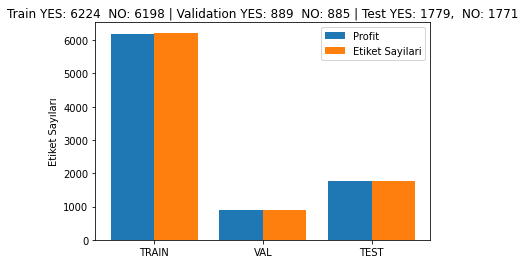

In [ ]:
ids = ['TRAIN', 'VAL', 'TEST']
yesnumbers = [len(trainyes), len(valyes), len(testyes)]
nonumbers = [len(trainno), len(valno), len(testno)]

label_count(ids, yesnumbers, nonumbers)

In [ ]:
TRAIN_DIR = train
TEST_DIR = test
VAL_DIR = val

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, (224,224))
X_test, y_test, _ = load_data(TEST_DIR, (224,224))
X_val, y_val, _ = load_data(VAL_DIR, (224,224))

100%|██████████| 2/2 [05:19<00:00, 159.74s/it]


12422 images loaded from /content/gdrive/MyDrive/brain_stroke_classification/TRAIN/ directory.


100%|██████████| 2/2 [01:22<00:00, 41.00s/it]


3550 images loaded from /content/gdrive/MyDrive/brain_stroke_classification/TEST/ directory.


100%|██████████| 2/2 [00:28<00:00, 14.43s/it]


1774 images loaded from /content/gdrive/MyDrive/brain_stroke_classification/VAL/ directory.


In [ ]:
plot_samples(X_train, y_train, labels, 30)

## <a id='dagilimorani'>5.1 Veri Setinin Dağılım Oranı</a>

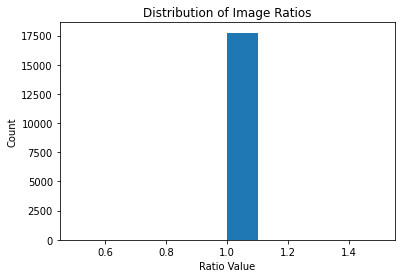

In [ ]:
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [ ]:
img = cv2.imread('../input/brain-stroke-dataset/TRAIN/YES/10078.png')
img = cv2.resize(
            img,
            dsize=(224,224),
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [ ]:
# apply this for each set
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

In [ ]:
plot_samples(X_train_crop, y_train, labels, 30)

In [ ]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [ ]:
# saving new images to the folder
!cd /content/gdrive/MyDrive/brain_stroke_classification/
!mkdir TRAIN_CROP TEST_CROP VAL_CROP TRAIN_CROP/YES TRAIN_CROP/NO TEST_CROP/YES TEST_CROP/NO VAL_CROP/YES VAL_CROP/NO

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

# <a id='CNN'>6. CNN Modeli</a>

Bu çalışmada kullanılacak olan CNN modeli VGG16'dır.

## <a id='augmentation'>6.1 Veri Çoğaltma</a>
> Veri setimizi her koşulda öğrenmeye uygun olacak şekilde genişletmemiz lazımdır.

In [ ]:
# set the paramters we want to change randomly
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
os.mkdir('preview')
x = X_train_crop[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

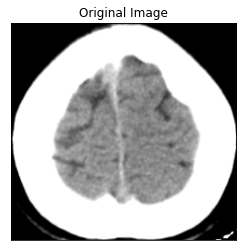

FileNotFoundError: ignored

<Figure size 1080x432 with 0 Axes>

In [ ]:
plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [ ]:
TRAIN_DIR = 'TRAIN_CROP/'
VAL_DIR = 'VAL_CROP/'
IMG_SIZE = (224,224)

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)

validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED
)

test_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=512,
    class_mode='binary',
    seed=RANDOM_SEED
)



Found 12422 images belonging to 2 classes.
Found 1774 images belonging to 2 classes.
Found 1774 images belonging to 2 classes.


## <a id='model'>4.2 Model İnşası</a>

In [ ]:
# load base model

base_model = DenseNet121(
    weights='imagenet',
    include_top=False, 
    input_shape=IMG_SIZE + (3,)
)

In [ ]:
from keras.models import load_model

In [ ]:
mymodel = load_model("/content/gdrive/MyDrive/brain_stroke_classification/densenet_stroke.h5")

In [ ]:
for layer in mymodel.layers[:-3]:
    layer.trainable = False

In [ ]:
NUM_CLASSES = 1

model = Sequential()
model.add(mymodel)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=1e-4),
    metrics=['binary_accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1)                 58419777  
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1024)              2048      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 58,422,850
Trainable params: 51,385,346
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
EPOCHS = 3
es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=6
)


history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples/train_generator.batch_size,
    epochs=EPOCHS,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples/validation_generator.batch_size,
    callbacks = [es]
)

model.save_weights("/content/gdrive/MyDrive/brain_stroke_classification/heatmap_weights.h5")

Epoch 1/3
  1/388 [..............................] - ETA: 10:53 - loss: 0.0681 - binary_accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
model.save_weights("/content/gdrive/MyDrive/brain_stroke_classification/heatmap_weights.h5")

In [ ]:
print(history.history.keys())

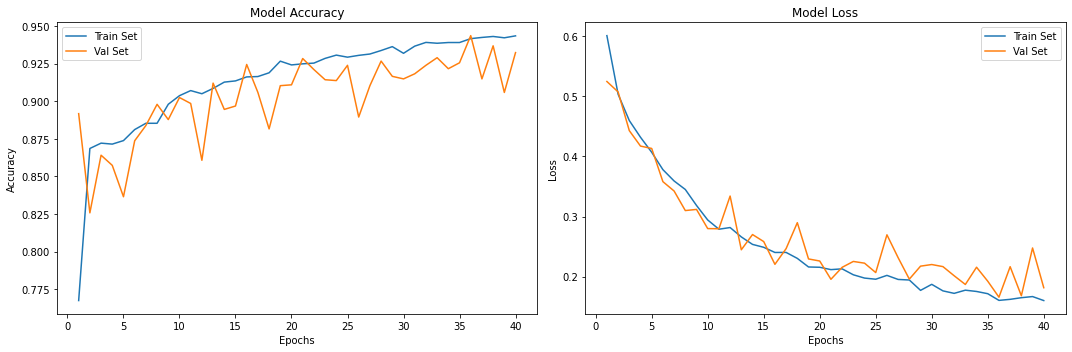

In [ ]:
# plot model performance
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

56/56 [==============================] - 7s 92ms/step
Val Accuracy = 0.58


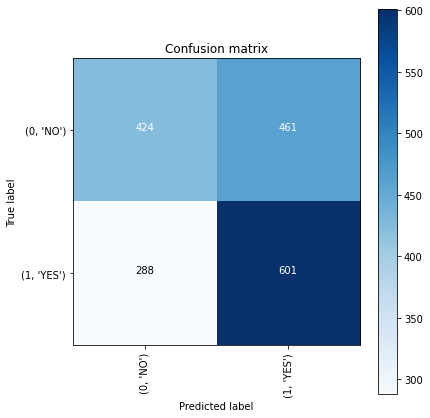

In [ ]:
# validate on val set
predictions = model.predict(X_val)
predictions = [1 if x>0.8 else 0 for x in predictions]


accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

In [ ]:
x_val,y_val = test_generator.next()

16/16 [==============================] - 3s 96ms/step
Test Accuracy = 0.93


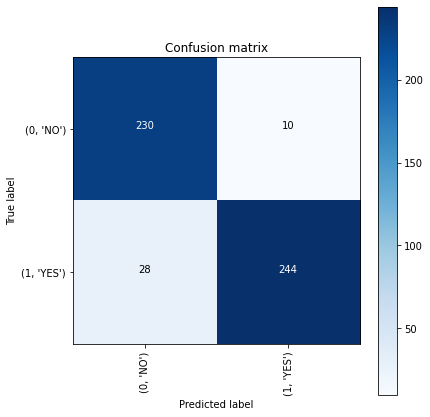

In [ ]:
# validate on test set
predictions = model.predict(x_val)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

In [ ]:
ind_list = np.argwhere((y_test == predictions) == False)[:, -1]
if ind_list.size == 0:
    print('There are no missclassified images.')
else:
    for i in ind_list:
        plt.figure()
        plt.imshow(X_test_crop[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Actual class: {y_val[i]}\nPredicted class: {predictions[i]}')
        plt.show()

In [ ]:
print("Evaluate on test data")
results = model.evaluate(validation_generator, batch_size=32)
print("test loss, test acc:", results)


Evaluate on test data
111/111 [==============================] - 7s 59ms/step - loss: 0.1816 - binary_accuracy: 0.9324
test loss, test acc: [0.18164287507534027, 0.9323562383651733]


In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_generator, batch_size=128)
print("test loss, test acc:", results)


Evaluate on test data
4/4 [==============================] - 27s 4s/step - loss: 0.1816 - binary_accuracy: 0.9324
test loss, test acc: [0.18164275586605072, 0.9323562383651733]


# <a id='test'>7. Test Aşamaları</a>

In [ ]:
# test için gereken kütüphaneleri import ediyoruz
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import argparse
#import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
print("[INFO] loading object detector...")
model = load_model('/content/gdrive/MyDrive/brain_stroke_classification/densenet_stroke_v4.h5')  # eğittimiz modelin ağırlıklarını çağırdık
                                                    # bu ağırlığı modele verdik ve model bu ağırlığa göre test yapacak

[INFO] loading object detector...


NameError: ignored

In [ ]:
def predicter(imagePath):

    im0 = cv2.imread(imagePath)
    im0 = cv2.cvtColor(im0, cv2.COLOR_BGR2RGB)
    im0 = cv2.resize(im0, (224,224))
    output = im0.copy()
    im0 = im0.astype("float")/255.0
    im0 = img_to_array(im0)
    im0 = np.expand_dims(im0, axis=0)
    proba = model.predict(im0)[0]
    thresh = 0.75
    
    if  proba > thresh:
        label = "yes"
    else:
        label = "no"

    text = "{} : {:.2f}% ".format(label, proba[0]*100)
    cv2.putText(output, text, (10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

    fig = plt.figure(figsize=(10,10))
    plt.grid(b=None)
    plt.axis("off")

    return plt.imshow(output)

# > **NO sınıfındaki görseller**

In [ ]:
imgPath = "/content/TEST/NO/10083.png"
predicter(imgPath)

In [ ]:
imgPath = "/content/TEST/NO/10304.png"
predicter(imgPath)

In [ ]:
imgPath = "/content/TEST/NO/10506.png"
predicter(imgPath)

In [ ]:
imgPath = "/content/TEST/NO/10680.png"
predicter(imgPath)

In [ ]:
imgPath = "/content/TEST/NO/1087.png"
predicter(imgPath)

# > **YES sınıfındaki görseller**

In [ ]:
imgPath = "/content/TEST/YES/10327.png"
predicter(imgPath)

In [ ]:
imgPath = "/content/TEST/YES/10586.png"
predicter(imgPath)

In [ ]:
imgPath = "/content/TEST/YES/10920.png"
predicter(imgPath)

In [ ]:
imgPath = "/content/TEST/YES/1137.png"
predicter(imgPath)

In [ ]:
imgPath = "/content/TEST/YES/1203.png"
predicter(imgPath)

# HEATMAP

In [12]:
import keras
import tensorflow as tf
import numpy as np
from keras.layers import Input
from keras.applications.densenet import DenseNet121, preprocess_input

In [13]:
new_input = Input(shape=(224,224,3))
model = DenseNet121(include_top = False, input_tensor=new_input, pooling='avg')

In [14]:
images = "/content/gdrive/MyDrive/brain_stroke_classification/TEST/YES/10039.png"
prepared_images = preprocess_image(images)

NameError: ignored

In [ ]:
new_input = Input(shape=(224,224,3))
model = DenseNet121(weights=None, input_tensor=new_input, classes=1)

In [ ]:
# Load model
model = DenseNet121(weights=None, include_top = False, classes=1, input_tensor = new_input)

# Gradient model, takes the original input and outputs tuple with:
# - output of conv layer (in this case: conv5_block3_3_conv)
# - output of head layer (original output)
grad_model = tf.keras.models.Model([model.model.inputs],
                                   [model.model.get_layer('conv5_block3_3_conv').output,
                                    model.model.output])

# Run model and record outputs, loss, and gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img)
    loss = predictions[:, label_idx]

# Output of conv layer
output = conv_outputs[0]

# Gradients of loss w.r.t. conv layer
grads = tape.gradient(loss, conv_outputs)[0]

# Guided Backprop (elimination of negative values)
gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = gate_f * gate_r * grads

# Average weight of filters
weights = tf.reduce_mean(guided_grads, axis=(0, 1))

# Class activation map (cam)
# Multiply output values of conv filters (feature maps) with gradient weights
cam = np.zeros(output.shape[0: 2], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * output[:, :, i]

# Or more elegant: 
# cam = tf.reduce_sum(output * weights, axis=2)

# Rescale to org image size and min-max scale
cam = cv2.resize(cam.numpy(), (224, 224))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())